# CIFAR-10 dataset

## Project 2 
Pegah Givehchian - 99222089

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. 

.The label classes in the dataset are:

airplane
automobile 
bird 
cat 
deer 
dog 
frog 
horse 
ship 
truck

In [125]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report


load data 

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
class_arr = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

x_train gives us the pixels of each image in the train group, which consists of 50000 images

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

y_train gives us an array of the group of the images, and each is a number from 0 to 9

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

It is better if we turn th emultiple arrays for y, into one single 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

I created a function that plots the sample which is given in the parameters, and shows the class as the label.

In [9]:
def plot_image(x,y,index):
    plt.figure(figsize = (10,2))
    plt.xlabel(class_arr[y_train[index]])
    plt.imshow(x[index])

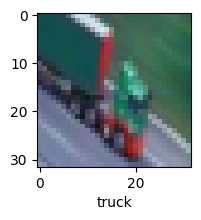

In [10]:
plot_image(x_train,y_train,50)

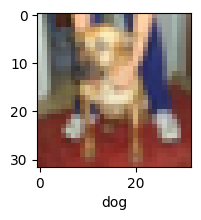

In [11]:
plot_image(x_train,y_train,51)

I'm gonna normalize the data for better results, so i divide all the data by 255 which is the max value of a byte. The value varies from 0 - 255 for each of the channels, R, G and B.

In [12]:
x_train = x_train/255
x_test = x_test/255

### Modeling MLP

In [126]:
simpleModel = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(units=225 ,activation='relu' ,name="hidden_layer_1"),
    Dense(units=1000 ,activation='relu' ,name="hidden_layer_2"),
    Dense(units=3000 ,activation='relu' ,name="hidden_layer_3"),
    Dense(units=10 ,activation='sigmoid' ,name="output_layer_4"),
])

In [127]:
simpleModel.compile(
    optimizer="SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'] #accuracy describes how a model generally performs. 
    #It's useful when classes are of equal importance in our classification.
)

simpleModel.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.9120 - accuracy: 0.3119
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6988 - accuracy: 0.3951
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.6098 - accuracy: 0.4255
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5433 - accuracy: 0.4526
Epoch 5/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4973 - accuracy: 0.4691


In [128]:
simpleModel.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4980 - accuracy: 0.4642


[1.4979604482650757, 0.4641999900341034]

In [129]:
prediction = simpleModel.predict(x_test)
predict_class = [np.argmax(element) for element in prediction]
print(classification_report(y_test, predict_class))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.52      0.59      0.55      1000
           1       0.60      0.59      0.60      1000
           2       0.30      0.42      0.35      1000
           3       0.31      0.40      0.35      1000
           4       0.51      0.17      0.26      1000
           5       0.43      0.27      0.33      1000
           6       0.40      0.69      0.51      1000
           7       0.68      0.35      0.46      1000
           8       0.61      0.63      0.62      1000
           9       0.55      0.53      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.46     10000
weighted avg       0.49      0.46      0.46     10000



### Modeling CNN

We use less layers and less neurons, because the CNN will do the work.

In [22]:
simpleModel_cnn = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((2,2)),
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), name="conv2D_layer_2"),
    MaxPooling2D((2,2)),
    Flatten(input_shape=(32,32,3)),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [23]:
simpleModel_cnn.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'] #accuracy counts how often the predictions equal the labels
)

simpleModel_cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4533 - accuracy: 0.4771
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1184 - accuracy: 0.6067
Epoch 3/5
1563/1563 [==============================] - 48s 30ms/step - loss: 0.9603 - accuracy: 0.6648
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8481 - accuracy: 0.7063
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7598 - accuracy: 0.7369


We see that by using cnn, even though we used less neurons and layers, the loss was half as much, in comparison to our mlp model

In [25]:
simpleModel_cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9230 - accuracy: 0.6890


[0.9229924082756042, 0.6890000104904175]

Even with our testing data, the loss has decreased significantly

In [ ]:
prediction = simpleModel_cnn.predict(x_test)
predict_class = [np.argmax(element) for element in prediction]
print(classification_report(y_test, predict_class))

We see that our average precision and recall has increased, which means that the general performance is better,
precision being the count of instances that were correctly predicted in a label, given all the predicted labels,
and recall being the count of correctly predicted instances, given all the actual instances of a class.

### Depth Effect

In [29]:
cnnModel1 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((2,2)),
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), name="conv2D_layer_2"),
    MaxPooling2D((2,2)),
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), name="conv2D_layer_3"),
    MaxPooling2D((2,2)),
    Flatten(input_shape=(32,32,3)),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [30]:
cnnModel1.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'] 
)

cnnModel1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6807 - accuracy: 0.7639
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6073 - accuracy: 0.7853
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5393 - accuracy: 0.8107
Epoch 4/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.4765 - accuracy: 0.8317
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 0.4147 - accuracy: 0.8549


In [31]:
cnnModel1.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.3072 - accuracy: 0.1018


[2.30716609954834, 0.10180000215768814]

We see that the loss has significantly increased, which means that our model is probably overfitting. 
The accuracy has decreased too, Although it has increased in the training set.
So in general it is a good sign, and means that the model is more accurate.

### Different Architectures


The first one is a normal model with one convolutional layer and a 3*3 filter and relu function as our activation function

In [92]:
cnnModel2 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((2,2)),
    Flatten(input_shape=(32,32,3)),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [93]:
cnnModel2.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

cnnModel2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4337 - accuracy: 0.4901
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1322 - accuracy: 0.6019
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9965 - accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8891 - accuracy: 0.6908
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8028 - accuracy: 0.7180
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7199 - accuracy: 0.7470
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6433 - accuracy: 0.7727
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5719 - accuracy: 0.8005
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5048 - accuracy: 0.8237
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [94]:
cnnModel2.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.2142 - accuracy: 0.6443


[1.2142307758331299, 0.6442999839782715]

We set our filter to 64 to see the impact

In [71]:
cnnModel3 = Sequential([
    Conv2D(filters=64, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((2,2)),
    Flatten(input_shape=(32,32,3)),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [72]:
cnnModel3.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'] 
)

cnnModel3.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4463 - accuracy: 0.4841
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1122 - accuracy: 0.6114
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9791 - accuracy: 0.6607
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8817 - accuracy: 0.6913
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8033 - accuracy: 0.7185


In [73]:
cnnModel3.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0963 - accuracy: 0.6212


[1.0963159799575806, 0.6212000250816345]

We see that in both testing and training set, our loss has increased which is a bad sign.
Now we set the kernel size to a 2*2 matrix.

In [74]:
cnnModel4 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(2,2), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((2,2)),
    Flatten(input_shape=(32,32,3)),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [75]:
cnnModel4.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'] 
)

cnnModel4.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4401 - accuracy: 0.4879
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1436 - accuracy: 0.5997
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0169 - accuracy: 0.6434
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9190 - accuracy: 0.6768
Epoch 5/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8363 - accuracy: 0.7065


In [76]:
cnnModel4.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0594 - accuracy: 0.6355


[1.0594440698623657, 0.6355000138282776]

Again we see that the accuracy has decreased and it didn't have a good effect.

We set our activation function to leaky relu to see the effect

In [77]:
cnnModel5 = Sequential([
    Conv2D(filters=32, activation='leaky_relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [95]:
cnnModel5.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy'] 
)

cnnModel5.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 0.4002 - accuracy: 0.8631
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2761 - accuracy: 0.9073
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.2014 - accuracy: 0.9335
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.1516 - accuracy: 0.9499
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.1240 - accuracy: 0.9590
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.1051 - accuracy: 0.9657
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0951 - accuracy: 0.9681
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0816 - accuracy: 0.9719
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0806 - accuracy: 0.9731
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [96]:
cnnModel5.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.2981 - accuracy: 0.6427


[2.298130989074707, 0.6427000164985657]

Accuracy in training set has increased, but overfitting has happened because the loss in our testing set has doubled.

max pooling with (3,3) matrices

In [97]:
cnnModel6 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [98]:
cnnModel6.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

cnnModel6.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4073 - accuracy: 0.5016
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1055 - accuracy: 0.6119
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9676 - accuracy: 0.6621
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8787 - accuracy: 0.6948
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7952 - accuracy: 0.7230
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7232 - accuracy: 0.7485
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6591 - accuracy: 0.7689
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.5906 - accuracy: 0.7936
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5309 - accuracy: 0.8162
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [99]:
cnnModel6.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0461 - accuracy: 0.6780


[1.0460742712020874, 0.6779999732971191]

although the result wasn't as accurate for our training set, but the testing set has given us a better loss and accuracy.

max pooling with (4,4) matrices

In [100]:
cnnModel7 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    MaxPooling2D((4,4)),
    Flatten(),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [101]:
cnnModel7.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

cnnModel7.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4519 - accuracy: 0.4823
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1704 - accuracy: 0.5883
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0463 - accuracy: 0.6317
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9564 - accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8902 - accuracy: 0.6902
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8263 - accuracy: 0.7115
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7741 - accuracy: 0.7315
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7254 - accuracy: 0.7468
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6827 - accuracy: 0.7621
Epoch 10/10
1563/1563 [==============================] - 21s 14m

In [102]:
cnnModel7.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9615 - accuracy: 0.6807


[0.9614757895469666, 0.6807000041007996]

Again even though the model isn't fitting the training set as well, but the testing set is giving significantly better 
results, so increasing the size of our pooling matrix has a good impact.

Average Pooling

In [103]:
cnnModel8 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    AveragePooling2D((2,2)),
    Flatten(),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [104]:
cnnModel8.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

cnnModel8.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4948 - accuracy: 0.4681
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2091 - accuracy: 0.5760
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0924 - accuracy: 0.6168
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0091 - accuracy: 0.6435
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9350 - accuracy: 0.6716
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8728 - accuracy: 0.6932
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8061 - accuracy: 0.7179
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7449 - accuracy: 0.7386
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6862 - accuracy: 0.7594
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [105]:
cnnModel8.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.2397 - accuracy: 0.6178


[1.2396692037582397, 0.6177999973297119]

Both training and testing loss has increased, so maxpooling has shown to be a better option.

Global Average Pooling

In [80]:
cnnModel9 = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [81]:
cnnModel9.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

cnnModel9.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0433 - accuracy: 0.2302
Epoch 2/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8588 - accuracy: 0.2980
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7501 - accuracy: 0.3339
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.7169 - accuracy: 0.3511
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6892 - accuracy: 0.3628


In [82]:
cnnModel9.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.6745 - accuracy: 0.3702


[1.6745140552520752, 0.3702000081539154]

This is probably one of the worst responses we've gotten so far, that's why global average pooling probably isn't a good option.

### Add batch normalization

In [106]:
cnnModel_batch = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(32,32,3), name="conv2D_layer_1"),
    BatchNormalization(),
    Flatten(),
    Dense(units=225, activation='relu', name="hidden_layer_1"),
    Dense(units=10, activation='softmax', name="output_layer"),
])

In [107]:
cnnModel_batch.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

cnnModel_batch.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5198 - accuracy: 0.4821
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0971 - accuracy: 0.6100
Epoch 3/5
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8603 - accuracy: 0.6966
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6311 - accuracy: 0.7798
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.4547 - accuracy: 0.8444


In [109]:
cnnModel_batch.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.4210 - accuracy: 0.5102


[2.4209702014923096, 0.510200023651123]

We see that the accuracy has decreased a lot in our training set, but is overfitting our model.
we could use techniques like dropout and ... to avoid this.

### Confusion Matrix

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

313/313 [==============================] - 1s 4ms/step


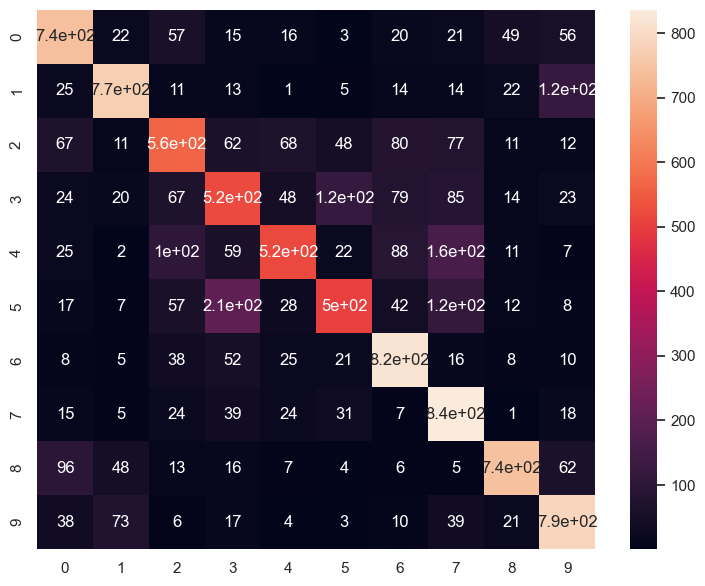

In [124]:
predict = cnnModel7.predict(x_test) 
classes = np.argmax(predict, axis=1)
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, classes), annot=True)
plt.show()

We see that a lot of the objects in class one were identified as 9, which means the model can't tell the automobiles from the trucks.
Also a lot of 4 and 5s were identified as 7, so the model can't really tell deers and dogs from horses.
This means we need a better model.

### Report

In [131]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.80      0.77      0.79      1000
           2       0.60      0.56      0.58      1000
           3       0.52      0.52      0.52      1000
           4       0.70      0.52      0.60      1000
           5       0.66      0.51      0.57      1000
           6       0.70      0.82      0.76      1000
           7       0.61      0.84      0.70      1000
           8       0.83      0.74      0.79      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

